In [1]:
import numpy as np
import pylab as plt
import h5py
import fitsio
import healpy as hp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import healsparse as hsp
import skyproj
from scipy import stats

In [2]:
plt.rcParams["axes.linewidth"]  = 1.0
plt.rcParams["xtick.major.size"]  = 10
plt.rcParams["xtick.minor.size"]  = 5
plt.rcParams["ytick.major.size"]  = 10
plt.rcParams["ytick.minor.size"]  = 5
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = 'False'
plt.rcParams['figure.figsize'] = [10, 10]
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=13)

import os
if os.environ['USER'] == 'dhayaa':
    os.environ['PATH'] = f"{os.environ['PATH']}:/software/texlive-2022-el8-x86_64/bin/x86_64-linux/"

    
_COLORS = ["f07167","219ebc","c767ac","ffba0a","59a270"]
_COLORS = ['#' + c if c[0] != '#' else c for c in _COLORS ]
COLORS = [_COLORS[1], _COLORS[4], _COLORS[0]]

from cycler import cycler

# Update the default prop_cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=COLORS)

# Get the Data mask

In [8]:
with h5py.File('/project/chihway/data/decade/metacal_gold_combined_mask_20240209.hdf', 'r') as f:
    
    mask = f['baseline_mcal_mask_noshear'][::] > 0
    
with h5py.File('/project/chihway/data/decade/metacal_gold_combined_20240209.hdf', 'r') as f:
    
    ra = f['RA'][::][mask]
    dec = f['DEC'][::][mask]
    
NSIDE = 128
pix = hp.ang2pix(NSIDE, ra, dec, lonlat = True)
Map = np.bincount(pix, minlength = hp.nside2npix(NSIDE)).astype(float)

# Plot some maps first

In [9]:
#Check available map types
!ls /project/kadrlica/secco/DELVE/combined_dr311+dr312/

airmass   dcr_e2		     maglim	    sum_intersection_gr.hsp
coverage  dr3_1_1_query_Nov28th.csv  nexp	    sum_intersection_iz.hsp
dcr_ddec  dr3_1_2_query_Nov28th.csv  skybrite
dcr_dra   exptime		     skysigma
dcr_e1	  fwhm			     sum_final.hsp


/home/chihway/.conda/envs/shear/lib/python3.9/site-packages/skyproj/_skyproj.py:955: FutureWarning: Usage of set_ylabel on a skyproj map has been deprecated. Please use sp.ax.set_ylabel() instead.
  warnings.warn("Usage of set_ylabel on a skyproj map has been deprecated. "
/home/chihway/.conda/envs/shear/lib/python3.9/site-packages/skyproj/_skyproj.py:937: FutureWarning: Usage of set_xlabel on a skyproj map has been deprecated. Please use sp.ax.set_xlabel() instead.
  warnings.warn("Usage of set_xlabel on a skyproj map has been deprecated. "
/home/chihway/.conda/envs/shear/lib/python3.9/site-packages/skyproj/_skyproj.py:955: FutureWarning: Usage of set_ylabel on a skyproj map has been deprecated. Please use sp.ax.set_ylabel() instead.
  warnings.warn("Usage of set_ylabel on a skyproj map has been deprecated. "
/home/chihway/.conda/envs/shear/lib/python3.9/site-packages/skyproj/_skyproj.py:937: FutureWarning: Usage of set_xlabel on a skyproj map has been deprecated. Please use sp.ax.set

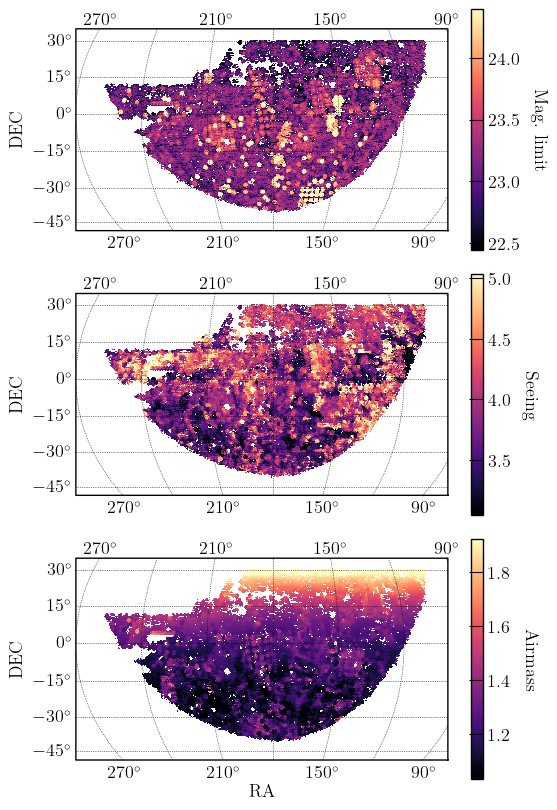

In [10]:
fig, ax = plt.subplots(3, 1, figsize = (6,10), sharex = True, sharey = True)
plt.subplots_adjust(hspace = 0.1)

maps  = ['maglim', 'fwhm', 'airmass']
for a, m in zip(ax.flat, maps):

    p = f'/project/kadrlica/secco/DELVE/combined_dr311+dr312/{m}/delve_dr311+dr312_i_{m}_Nov28th.hsp'
    
    X  = hsp.HealSparseMap.read(p)
    RA, DEC = X.valid_pixels_pos()
    mask = Map[hp.ang2pix(NSIDE, RA, DEC, lonlat = True)] == 0
    X.update_values_pix(X.valid_pixels[mask], hp.UNSEEN, nest = True)
    sp = skyproj.McBrydeSkyproj(ax = a, lon_0 = 180, extent = [100, 270, -49, 35])
    
    im = sp.draw_hspmap(X, cmap = 'magma', zoom = False, rasterized = True,)

    if m == 'fwhm': m = 'seeing'
    if m == 'maglim': m = 'Mag. limit'
    
    c = sp.draw_colorbar(pad = 0.05, fontsize = 13)
    c.set_label(label = m.capitalize(), rotation = 270, labelpad = 20)

    sp.set_ylabel('DEC', size = 13, pad = 5)
    sp.set_xlabel('')
    
    
sp.set_xlabel('RA', size = 13, pad = 5)
plt.savefig('./SysMaps.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

# Now do the linear regression of all systematics

In [3]:
import sys

sys.path.append('/home/dhayaa/DECADE/shearcat/shear_tests')
from SysmapTestRunner import SysmapTestRunner

In [4]:
RUN = SysmapTestRunner(NSIDE = 128, 
                       data_path = '/project/chihway/data/decade/metacal_gold_combined_20240209.hdf',)

In [4]:
maps = ['airmass', 'dcr_e1', 'dcr_e2', 'dcr_ddec', 'dcr_dra', 'maglim',  'exptime', 'fwhm', 'skysigma', 'skybrite', 'nexp']
bands = ['r', 'i', 'z']

In [6]:
res = RUN.go(maps, bands)

Function get_data_maps took 32.157 seconds to run.
FINISHED LOADING MASKS
FINISHED LOADING PIX
FINISHED LOADING SHEAR
Function _pix_avg took 0.99421 seconds to run.
Function _pix_avg took 0.99648 seconds to run.
Function _pix_avg took 0.99442 seconds to run.
Function _pix_avg took 0.99238 seconds to run.
Function _pix_avg took 0.99434 seconds to run.
Function _pix_avg took 0.99754 seconds to run.
Function _pix_avg took 0.99427 seconds to run.
Function _pix_avg took 0.99763 seconds to run.
Function get_response_maps took 154.77 seconds to run.
Function assign_patches took 0.45047 seconds to run.
Function assign_patches took 0.00723 seconds to run.


  0%|          | 0/14850 [00:00<?, ?it/s]

Function get_sys_map took 12.757 seconds to run.
Function assign_patches took 0.0090852 seconds to run.


  2%|▏         | 294/14850 [00:24<14:23, 16.86it/s] 

Function get_sys_map took 11.454 seconds to run.
Function assign_patches took 0.0079758 seconds to run.


  3%|▎         | 392/14850 [00:34<18:28, 13.04it/s]

Function get_sys_map took 9.9829 seconds to run.
Function assign_patches took 0.010839 seconds to run.


  4%|▎         | 553/14850 [00:44<14:44, 16.16it/s]

Function get_sys_map took 9.8996 seconds to run.
Function assign_patches took 0.004379 seconds to run.


  5%|▍         | 726/14850 [00:54<12:36, 18.67it/s]

Function get_sys_map took 9.7864 seconds to run.
Function assign_patches took 0.0092189 seconds to run.


  6%|▌         | 893/14850 [01:04<11:43, 19.84it/s]

Function get_sys_map took 9.7843 seconds to run.
Function assign_patches took 0.0050507 seconds to run.


  6%|▋         | 956/14850 [01:14<17:37, 13.14it/s]

Function get_sys_map took 9.8547 seconds to run.
Function assign_patches took 0.0034862 seconds to run.


  8%|▊         | 1151/14850 [01:24<13:07, 17.40it/s]

Function get_sys_map took 9.9847 seconds to run.
Function assign_patches took 0.0069931 seconds to run.


  9%|▉         | 1313/14850 [01:34<11:57, 18.87it/s]

Function get_sys_map took 9.7449 seconds to run.
Function assign_patches took 0.0051169 seconds to run.


 10%|▉         | 1476/14850 [01:44<11:16, 19.77it/s]

Function get_sys_map took 9.7775 seconds to run.
Function assign_patches took 0.0049565 seconds to run.


 11%|█         | 1637/14850 [01:52<09:57, 22.12it/s]

Function get_sys_map took 7.9328 seconds to run.
Function assign_patches took 0.0049908 seconds to run.


 12%|█▏        | 1796/14850 [02:03<10:25, 20.85it/s]

Function get_sys_map took 9.9848 seconds to run.
Function assign_patches took 0.0067363 seconds to run.


 13%|█▎        | 1868/14850 [02:13<15:44, 13.75it/s]

Function get_sys_map took 10.008 seconds to run.
Function assign_patches took 0.0067127 seconds to run.


 14%|█▍        | 2053/14850 [02:23<12:07, 17.60it/s]

Function get_sys_map took 9.777 seconds to run.
Function assign_patches took 0.0045722 seconds to run.


 15%|█▍        | 2220/14850 [02:33<11:01, 19.09it/s]

Function get_sys_map took 9.8949 seconds to run.
Function assign_patches took 0.0050023 seconds to run.


 16%|█▌        | 2383/14850 [02:43<10:33, 19.69it/s]

Function get_sys_map took 9.9148 seconds to run.
Function assign_patches took 0.0050189 seconds to run.


 17%|█▋        | 2544/14850 [02:53<10:18, 19.89it/s]

Function get_sys_map took 9.9323 seconds to run.
Function assign_patches took 0.011763 seconds to run.


 18%|█▊        | 2617/14850 [03:03<15:00, 13.58it/s]

Function get_sys_map took 9.9189 seconds to run.
Function assign_patches took 0.005054 seconds to run.


 19%|█▉        | 2803/14850 [03:13<11:28, 17.49it/s]

Function get_sys_map took 9.7779 seconds to run.
Function assign_patches took 0.0050046 seconds to run.


 20%|█▉        | 2959/14850 [03:23<10:41, 18.54it/s]

Function get_sys_map took 9.8615 seconds to run.
Function assign_patches took 0.0049841 seconds to run.


 21%|██        | 3117/14850 [03:33<10:11, 19.20it/s]

Function get_sys_map took 9.8881 seconds to run.
Function assign_patches took 0.0050194 seconds to run.


 22%|██▏       | 3273/14850 [03:41<08:59, 21.44it/s]

Function get_sys_map took 7.9591 seconds to run.
Function assign_patches took 0.0050316 seconds to run.


 23%|██▎       | 3431/14850 [03:51<09:12, 20.67it/s]

Function get_sys_map took 9.8413 seconds to run.
Function assign_patches took 0.0067577 seconds to run.


 24%|██▍       | 3592/14850 [04:01<09:09, 20.50it/s]

Function get_sys_map took 9.8596 seconds to run.
Function assign_patches took 0.003824 seconds to run.


 25%|██▍       | 3652/14850 [04:11<14:12, 13.13it/s]

Function get_sys_map took 9.8358 seconds to run.
Function assign_patches took 0.0044444 seconds to run.


 26%|██▌       | 3849/14850 [04:21<10:28, 17.51it/s]

Function get_sys_map took 9.9993 seconds to run.
Function assign_patches took 0.0076089 seconds to run.


 27%|██▋       | 4009/14850 [04:31<09:37, 18.78it/s]

Function get_sys_map took 9.8213 seconds to run.
Function assign_patches took 0.0044467 seconds to run.


 28%|██▊       | 4171/14850 [04:41<09:04, 19.61it/s]

Function get_sys_map took 9.856 seconds to run.
Function assign_patches took 0.0049524 seconds to run.


 29%|██▉       | 4328/14850 [04:51<08:59, 19.51it/s]

Function get_sys_map took 10.023 seconds to run.
Function assign_patches took 0.0060399 seconds to run.


 30%|██▉       | 4399/14850 [05:01<13:05, 13.30it/s]

Function get_sys_map took 9.919 seconds to run.
Function assign_patches took 0.0050392 seconds to run.


 31%|███       | 4602/14850 [05:12<09:32, 17.89it/s]

Function get_sys_map took 9.9185 seconds to run.
Function assign_patches took 0.0076184 seconds to run.


 32%|███▏      | 4767/14850 [05:22<08:45, 19.18it/s]

Function get_sys_map took 9.8259 seconds to run.
Function assign_patches took 0.0050321 seconds to run.


 33%|███▎      | 4931/14850 [05:29<07:27, 22.19it/s]

Function get_sys_map took 7.7009 seconds to run.
Function assign_patches took 0.003619 seconds to run.


 34%|███▍      | 5095/14850 [05:39<07:33, 21.50it/s]

Function get_sys_map took 9.743 seconds to run.
Function assign_patches took 0.006309 seconds to run.


 35%|███▍      | 5156/14850 [05:49<11:44, 13.75it/s]

Function get_sys_map took 9.6354 seconds to run.
Function assign_patches took 0.0036576 seconds to run.


 36%|███▌      | 5352/14850 [05:59<08:39, 18.27it/s]

Function get_sys_map took 9.561 seconds to run.
Function assign_patches took 0.003617 seconds to run.


 37%|███▋      | 5504/14850 [06:09<08:29, 18.36it/s]

Function get_sys_map took 10.324 seconds to run.
Function assign_patches took 0.017335 seconds to run.


 38%|███▊      | 5671/14850 [06:19<07:46, 19.68it/s]

Function get_sys_map took 9.7482 seconds to run.
Function assign_patches took 0.0048923 seconds to run.


 39%|███▉      | 5837/14850 [06:29<07:22, 20.36it/s]

Function get_sys_map took 9.7722 seconds to run.
Function assign_patches took 0.0050788 seconds to run.


 40%|████      | 6000/14850 [06:39<07:10, 20.54it/s]

Function get_sys_map took 9.7443 seconds to run.
Function assign_patches took 0.0078087 seconds to run.


 41%|████      | 6061/14850 [06:49<11:00, 13.30it/s]

Function get_sys_map took 9.8011 seconds to run.
Function assign_patches took 0.0052228 seconds to run.


 42%|████▏     | 6253/14850 [06:59<08:08, 17.60it/s]

Function get_sys_map took 9.8125 seconds to run.
Function assign_patches took 0.0089767 seconds to run.


 43%|████▎     | 6404/14850 [07:09<07:39, 18.40it/s]

Function get_sys_map took 9.7953 seconds to run.
Function assign_patches took 0.010191 seconds to run.


 44%|████▍     | 6558/14850 [07:17<06:33, 21.09it/s]

Function get_sys_map took 7.7587 seconds to run.
Function assign_patches took 0.0057483 seconds to run.


 45%|████▌     | 6712/14850 [07:27<06:55, 19.61it/s]

Function get_sys_map took 10.449 seconds to run.
Function assign_patches took 0.0080407 seconds to run.


 46%|████▋     | 6881/14850 [07:37<06:32, 20.31it/s]

Function get_sys_map took 9.8705 seconds to run.
Function assign_patches took 0.0084577 seconds to run.


 47%|████▋     | 7045/14850 [07:47<06:20, 20.54it/s]

Function get_sys_map took 9.7526 seconds to run.
Function assign_patches took 0.0054951 seconds to run.


 48%|████▊     | 7107/14850 [07:57<09:38, 13.38it/s]

Function get_sys_map took 9.7242 seconds to run.
Function assign_patches took 0.0050235 seconds to run.


 49%|████▉     | 7301/14850 [08:07<07:02, 17.86it/s]

Function get_sys_map took 9.6077 seconds to run.
Function assign_patches took 0.0084336 seconds to run.


 50%|█████     | 7455/14850 [08:17<06:40, 18.44it/s]

Function get_sys_map took 10.156 seconds to run.
Function assign_patches took 0.0052421 seconds to run.


 51%|█████▏    | 7619/14850 [08:27<06:11, 19.44it/s]

Function get_sys_map took 9.8096 seconds to run.
Function assign_patches took 0.005739 seconds to run.


 52%|█████▏    | 7783/14850 [08:37<05:55, 19.88it/s]

Function get_sys_map took 10.01 seconds to run.
Function assign_patches took 0.007617 seconds to run.


 53%|█████▎    | 7857/14850 [08:48<08:35, 13.56it/s]

Function get_sys_map took 10.03 seconds to run.
Function assign_patches took 0.0076957 seconds to run.


 54%|█████▍    | 8050/14850 [08:58<06:27, 17.56it/s]

Function get_sys_map took 9.9505 seconds to run.
Function assign_patches took 0.0076523 seconds to run.


 55%|█████▌    | 8231/14850 [09:06<05:06, 21.63it/s]

Function get_sys_map took 7.885 seconds to run.
Function assign_patches took 0.0053852 seconds to run.


 57%|█████▋    | 8398/14850 [09:16<05:09, 20.85it/s]

Function get_sys_map took 10.105 seconds to run.
Function assign_patches took 0.022247 seconds to run.


 57%|█████▋    | 8476/14850 [09:26<07:32, 14.09it/s]

Function get_sys_map took 10.193 seconds to run.
Function assign_patches took 0.0081136 seconds to run.


 58%|█████▊    | 8649/14850 [09:37<06:04, 17.00it/s]

Function get_sys_map took 9.9952 seconds to run.
Function assign_patches took 0.0051556 seconds to run.


 59%|█████▉    | 8832/14850 [09:47<05:11, 19.31it/s]

Function get_sys_map took 10.019 seconds to run.
Function assign_patches took 0.0051129 seconds to run.


 60%|██████    | 8920/14850 [09:57<06:56, 14.23it/s]

Function get_sys_map took 9.9629 seconds to run.
Function assign_patches took 0.0074775 seconds to run.


 61%|██████▏   | 9099/14850 [10:07<05:33, 17.25it/s]

Function get_sys_map took 10.012 seconds to run.
Function assign_patches took 0.0055771 seconds to run.


 63%|██████▎   | 9291/14850 [10:17<04:40, 19.83it/s]

Function get_sys_map took 10.033 seconds to run.
Function assign_patches took 0.0071676 seconds to run.


 63%|██████▎   | 9385/14850 [10:27<06:06, 14.93it/s]

Function get_sys_map took 9.8142 seconds to run.
Function assign_patches took 0.0066133 seconds to run.


 64%|██████▍   | 9556/14850 [10:37<05:00, 17.60it/s]

Function get_sys_map took 9.8297 seconds to run.
Function assign_patches took 0.0055282 seconds to run.


 65%|██████▌   | 9725/14850 [10:47<04:25, 19.28it/s]

Function get_sys_map took 9.8331 seconds to run.
Function assign_patches took 0.0056601 seconds to run.


 67%|██████▋   | 9894/14850 [10:55<03:40, 22.50it/s]

Function get_sys_map took 7.7713 seconds to run.
Function assign_patches took 0.0052624 seconds to run.


 67%|██████▋   | 9957/14850 [11:05<05:42, 14.28it/s]

Function get_sys_map took 9.6556 seconds to run.
Function assign_patches took 0.0066235 seconds to run.


 68%|██████▊   | 10153/14850 [11:15<04:14, 18.46it/s]

Function get_sys_map took 9.7395 seconds to run.
Function assign_patches took 0.0091097 seconds to run.


 69%|██████▉   | 10311/14850 [11:25<03:53, 19.44it/s]

Function get_sys_map took 9.6692 seconds to run.
Function assign_patches took 0.0044978 seconds to run.


 71%|███████   | 10474/14850 [11:35<03:36, 20.21it/s]

Function get_sys_map took 9.6827 seconds to run.
Function assign_patches took 0.0070615 seconds to run.


 72%|███████▏  | 10641/14850 [11:45<03:23, 20.67it/s]

Function get_sys_map took 9.8648 seconds to run.
Function assign_patches took 0.010579 seconds to run.


 72%|███████▏  | 10703/14850 [11:54<05:09, 13.41it/s]

Function get_sys_map took 9.8626 seconds to run.
Function assign_patches took 0.011774 seconds to run.


 73%|███████▎  | 10905/14850 [12:05<03:41, 17.79it/s]

Function get_sys_map took 10.21 seconds to run.
Function assign_patches took 0.0058334 seconds to run.


 75%|███████▍  | 11070/14850 [12:15<03:20, 18.86it/s]

Function get_sys_map took 10.205 seconds to run.
Function assign_patches took 0.0089755 seconds to run.


 76%|███████▌  | 11250/14850 [12:25<02:56, 20.38it/s]

Function get_sys_map took 10.026 seconds to run.
Function assign_patches took 0.0056348 seconds to run.


 76%|███████▋  | 11334/14850 [12:36<04:02, 14.47it/s]

Function get_sys_map took 9.9521 seconds to run.
Function assign_patches took 0.0072489 seconds to run.


 77%|███████▋  | 11506/14850 [12:44<02:56, 18.91it/s]

Function get_sys_map took 7.9052 seconds to run.
Function assign_patches took 0.01068 seconds to run.


 79%|███████▊  | 11681/14850 [12:54<02:36, 20.27it/s]

Function get_sys_map took 9.8144 seconds to run.
Function assign_patches took 0.019403 seconds to run.


 79%|███████▉  | 11748/14850 [13:03<03:46, 13.68it/s]

Function get_sys_map took 9.7796 seconds to run.
Function assign_patches took 0.011048 seconds to run.


 81%|████████  | 11955/14850 [13:13<02:36, 18.46it/s]

Function get_sys_map took 9.7245 seconds to run.
Function assign_patches took 0.0070229 seconds to run.


 81%|████████▏ | 12071/14850 [13:23<02:47, 16.57it/s]

Function get_sys_map took 9.7347 seconds to run.
Function assign_patches took 0.0055559 seconds to run.


 83%|████████▎ | 12256/14850 [13:33<02:11, 19.71it/s]

Function get_sys_map took 9.7354 seconds to run.
Function assign_patches took 0.0050342 seconds to run.


 84%|████████▎ | 12415/14850 [13:43<02:01, 20.02it/s]

Function get_sys_map took 9.8524 seconds to run.
Function assign_patches took 0.0049796 seconds to run.


 85%|████████▍ | 12577/14850 [13:53<01:51, 20.30it/s]

Function get_sys_map took 9.8348 seconds to run.
Function assign_patches took 0.0055251 seconds to run.


 86%|████████▌ | 12742/14850 [14:03<01:41, 20.73it/s]

Function get_sys_map took 9.7229 seconds to run.
Function assign_patches took 0.005096 seconds to run.


 86%|████████▌ | 12803/14850 [14:13<02:32, 13.46it/s]

Function get_sys_map took 9.6736 seconds to run.
Function assign_patches took 0.0057786 seconds to run.


 88%|████████▊ | 13006/14850 [14:23<01:40, 18.32it/s]

Function get_sys_map took 9.696 seconds to run.
Function assign_patches took 0.005074 seconds to run.


 88%|████████▊ | 13140/14850 [14:31<01:27, 19.46it/s]

Function get_sys_map took 7.7971 seconds to run.
Function assign_patches took 0.0051413 seconds to run.


 90%|████████▉ | 13306/14850 [14:41<01:15, 20.41it/s]

Function get_sys_map took 9.6826 seconds to run.
Function assign_patches took 0.00512 seconds to run.


 91%|█████████ | 13465/14850 [14:50<01:07, 20.42it/s]

Function get_sys_map took 9.7071 seconds to run.
Function assign_patches took 0.011112 seconds to run.


 92%|█████████▏| 13626/14850 [15:01<01:01, 19.95it/s]

Function get_sys_map took 10.275 seconds to run.
Function assign_patches took 0.0073066 seconds to run.


 92%|█████████▏| 13698/14850 [15:11<01:25, 13.54it/s]

Function get_sys_map took 9.8928 seconds to run.
Function assign_patches took 0.0052774 seconds to run.


 94%|█████████▎| 13905/14850 [15:21<00:51, 18.52it/s]

Function get_sys_map took 9.6146 seconds to run.
Function assign_patches took 0.0059047 seconds to run.


 95%|█████████▍| 14069/14850 [15:31<00:39, 19.69it/s]

Function get_sys_map took 9.7873 seconds to run.
Function assign_patches took 0.006604 seconds to run.


 96%|█████████▌| 14233/14850 [15:41<00:30, 20.29it/s]

Function get_sys_map took 9.7557 seconds to run.
Function assign_patches took 0.0064957 seconds to run.


 97%|█████████▋| 14395/14850 [15:50<00:22, 20.44it/s]

Function get_sys_map took 9.759 seconds to run.
Function assign_patches took 0.011241 seconds to run.


 97%|█████████▋| 14455/14850 [16:00<00:29, 13.31it/s]

Function get_sys_map took 9.7066 seconds to run.
Function assign_patches took 0.0064919 seconds to run.


 99%|█████████▊| 14655/14850 [16:10<00:10, 18.00it/s]

Function get_sys_map took 9.7739 seconds to run.
Function assign_patches took 0.0065374 seconds to run.


100%|██████████| 14850/14850 [16:18<00:00, 15.17it/s]

Function get_sys_map took 7.7258 seconds to run.
Function assign_patches took 0.0064867 seconds to run.
Function go took 1166.1 seconds to run.


In [8]:
res = np.save('./Shear_vs_Sys_NSIDE128_Npatch150.npy', res, allow_pickle = True)

In [5]:
# res = np.load('./Shear_vs_Sys_NSIDE128_Npatch150.npy', allow_pickle = True)[()]
res = np.load('/project/chihway/dhayaa/DECADE/For_Chihway/Shear_vs_Sys_NSIDE128_Npatch150.npy', allow_pickle = True)[()]

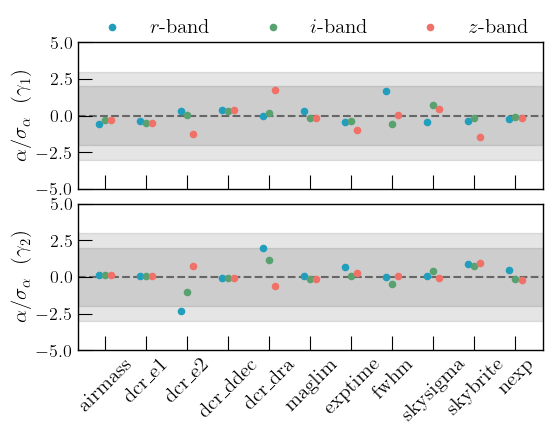

In [7]:
fig, ax = plt.subplots(2, 1, figsize = (6,4), sharex = True, sharey = True)
plt.subplots_adjust(hspace = 0.1)

bands = list(res['g1'].keys())
maps  = list(res['g1'][bands[0]].keys())

for a, d in zip(ax.flat, ['g1', 'g2']):
        
    for b_i in range(len(bands)):
        
        b = bands[b_i]
        for s_i in range(len(maps)):
            
            m = maps[s_i]
            
            s = np.std(res[d][b][m]) * np.sqrt(150) #np.sqrt(RUN.Npatch)
            m = np.average(res[d][b][m])

#             print(d, maps[s_i], bands[b_i], m, m/s)
            a.scatter(s_i + 0.15*(b_i - 1), m/s, s = 20, color = 'C%d' % b_i)
            
            
ax[0].legend([plt.scatter([], [], s = 20) for i in range(3)], ['$r$-band', '$i$-band', '$z$-band'],
             fontsize = 15, frameon = False, loc = 'center', bbox_to_anchor = (0.5, 1.1), ncol = 3)
ax[1].set_xticks(range(len(maps)), maps, rotation = 45, ha = 'center', fontsize = 15)

ax[0].set_ylabel(r'$\alpha/\sigma_\alpha \,\,\,\,(\gamma_1)$', size = 15)
ax[1].set_ylabel(r'$\alpha/\sigma_\alpha \,\,\,\,(\gamma_2)$', size = 15)
    
    
for a in ax.flat:
    a.axhline(0, alpha = 0.5, ls ='--', color = 'k', zorder = -100)
    a.axhspan(-2, 2, alpha = 0.1, color = 'k', zorder = -100)
    a.axhspan(-3, 3, alpha = 0.1, color = 'k', zorder = -100)
    a.set_ylim(-5, 5)
    
    
plt.savefig('./ShearSysRegression.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

# Plot spatially varying response

In [ ]:
RUN = SysmapTestRunner(NSIDE = 128, 
                       data_path = '/project/chihway/data/decade/metacal_gold_combined_20240209.hdf',)

In [17]:
g1, g2, N = RUN.get_data_maps()
R11, R22  = RUN.get_response_maps()

Function get_data_maps took 31.12 seconds to run.
FINISHED LOADING MASKS
FINISHED LOADING PIX
FINISHED LOADING SHEAR
Function _pix_avg took 1.2186 seconds to run.
Function _pix_avg took 1.2109 seconds to run.
Function _pix_avg took 1.2125 seconds to run.
Function _pix_avg took 1.2113 seconds to run.
Function _pix_avg took 1.2178 seconds to run.
Function _pix_avg took 1.2109 seconds to run.
Function _pix_avg took 1.224 seconds to run.
Function _pix_avg took 1.2108 seconds to run.
Function get_response_maps took 166.55 seconds to run.


In [18]:
M = hsp.HealSparseMap(healpix_map = np.where(N > 0, R11, hp.UNSEEN), nest = False, sentinel = 0., nside_coverage = 128, )

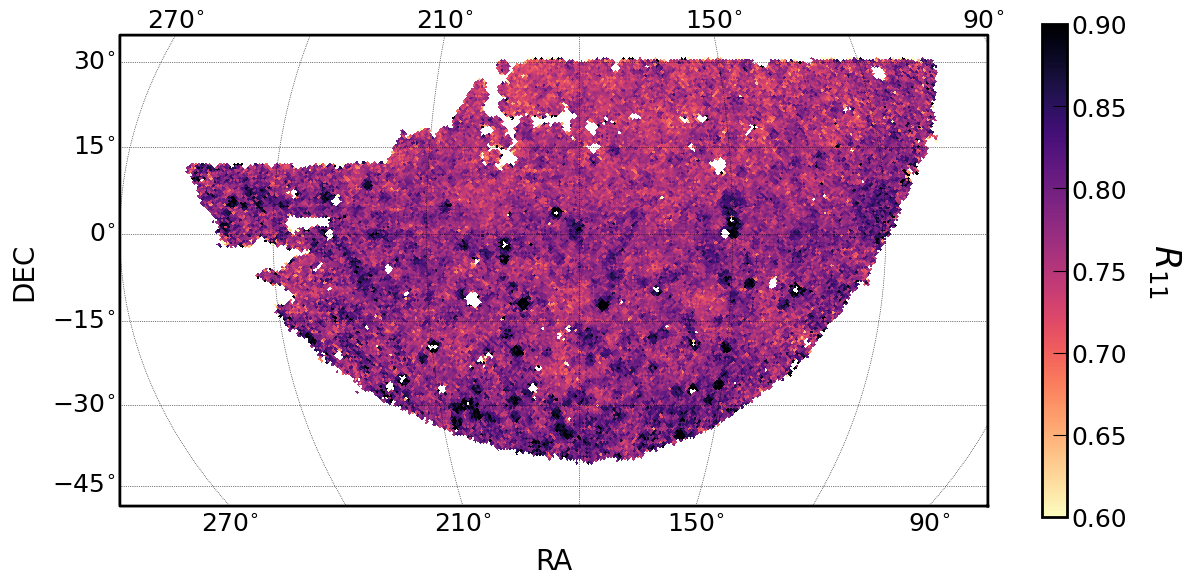

In [20]:
fig, ax = plt.subplots(1, 1, figsize = (14,8))
sp = skyproj.McBrydeSkyproj(ax = ax, lon_0 = 180, extent = [100, 270, -49, 35])
im = sp.draw_hspmap(M, cmap = 'magma_r', zoom = False, vmin = 0.6, vmax = 0.9, rasterized = True,)

c = plt.colorbar(im[0], fraction = 0.15, shrink = 0.8, aspect = 20)
c.set_label(label = r'$R_{11}$', rotation = 270, labelpad = 40, size = 25)
sp.set_ylabel('DEC', size = 20, pad = 10)
sp.set_xlabel('RA', size = 20, pad = 10)


plt.savefig('./ResponseMap.pdf', dpi = 300, bbox_inches = 'tight')

plt.show()

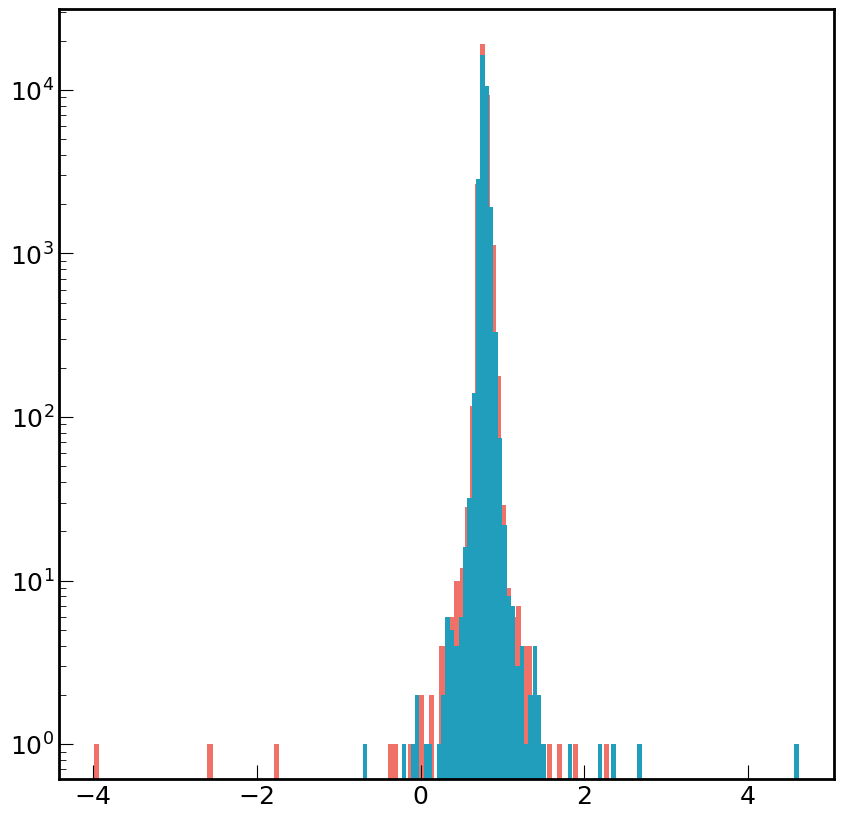

In [102]:
plt.hist(R11[N > 0], bins = 100, log = True);
plt.hist(R22[N > 0], bins = 100, log = True);